In [20]:
from germansentiment import SentimentModel
import datetime
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm
from scipy.signal import savgol_filter
import matplotlib.dates as mdates

In [2]:
plt.rcParams['figure.figsize'] = (24, 14)

In [3]:
model = SentimentModel()

In [4]:
full_chat_log = open('chat.txt', 'r').readlines()
dates = [e.split(',')[0] for e in full_chat_log]

In [5]:
# merge lines not starting with a date with the previous line
# and create a new dates list
new_chat_log = [] 
last_chat = []
new_dates = []

for i, date in enumerate(dates): 
    try: 
        datetime.datetime.strptime(date, '%d/%m/%Y')  
        
        new_dates.append(date)
        msg = ' '.join(last_chat)
        msg = ':'.join(msg.split(':')[2:])
        new_chat_log.append(msg.strip())
        last_chat.clear()
        
        last_chat.append(full_chat_log[i])
    except ValueError:
        last_chat.append(full_chat_log[i])

full_chat_log, dates = new_chat_log[2:], new_dates[2:]

In [6]:
# loop through each msg and date
# and generate a nested list for all messages of the same date
last_date = ''
messages = []
new_dates = []

current_messages = []
for msg, date in zip(full_chat_log, dates):
    if len(msg.split()) <= 2:
        continue
    
    current_messages.append(msg)
    
    if last_date != date:
        messages.append(current_messages)
        new_dates.append(date)
        current_messages = []
    
    last_date = date

dates = new_dates

In [7]:
# get number length of each date
messages_per_day = []
for day_msgs in messages:
    messages_per_day.append(len(day_msgs))
    
messages_per_day = np.array(messages_per_day)

In [8]:
# top ten days of messages (index)
messages_per_day.argsort()[-10:][::-1]

array([304, 108, 152, 162, 153, 155, 156, 107, 161, 101])

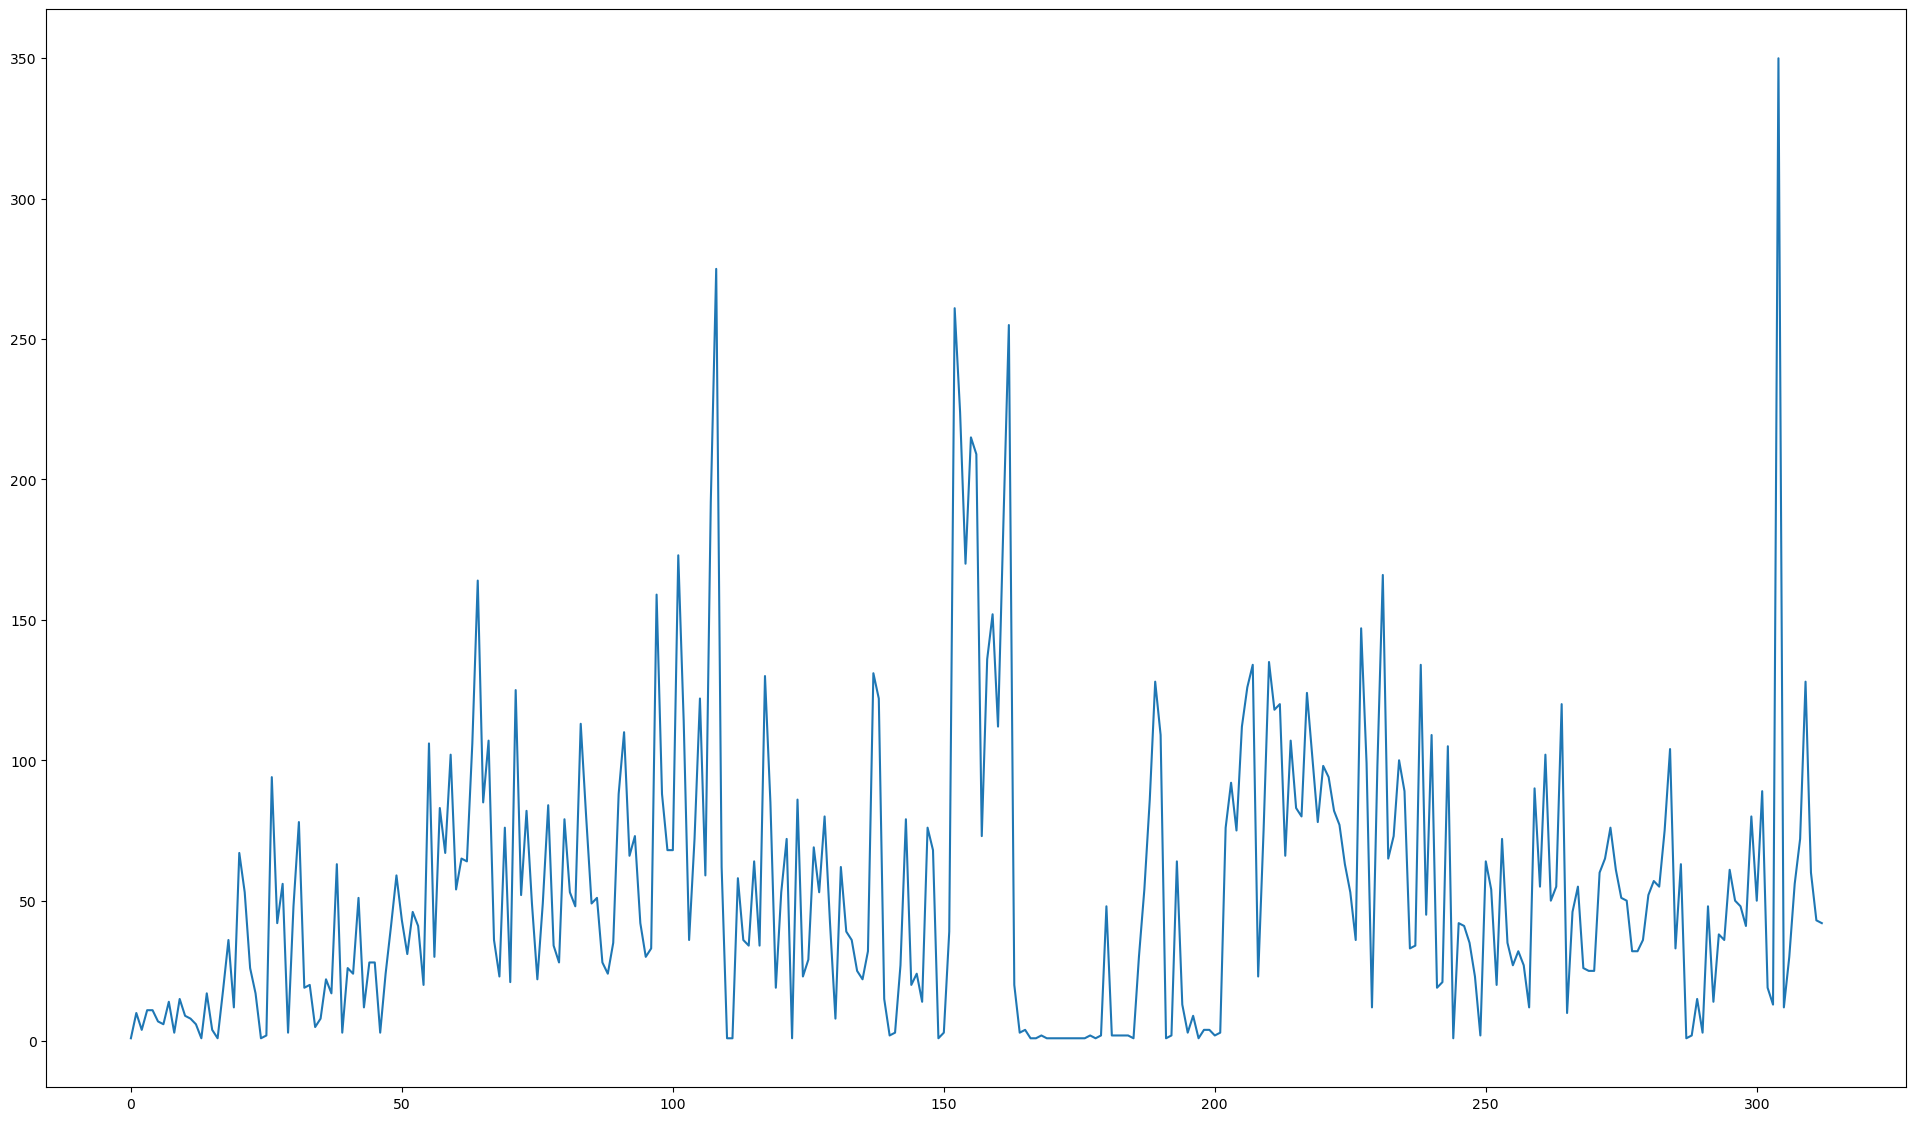

In [9]:
plt.plot(messages_per_day)

In [10]:
# get the average sentiment of each day
sentiment_val = {
    'negative': -1,
    'neutral': 0,
    'positive': 1
}

avg_sentiments = np.zeros(len(messages))
summed_sentiments = np.zeros(len(messages))

for i in tqdm(range(len(messages))):  
    day_sents = model.predict_sentiment(messages[i])
    day_score = 0
    
    for sent in day_sents:
        day_score += sentiment_val[sent]
    
    summed_sentiments[i] = day_score
    avg_sentiments[i] = day_score / len(messages[i])

  0%|          | 0/313 [00:00<?, ?it/s]

In [35]:
# convert dates to real datetime objects
real_dates = np.array([datetime.datetime.strptime(date, '%d/%m/%Y').date() for date in dates])

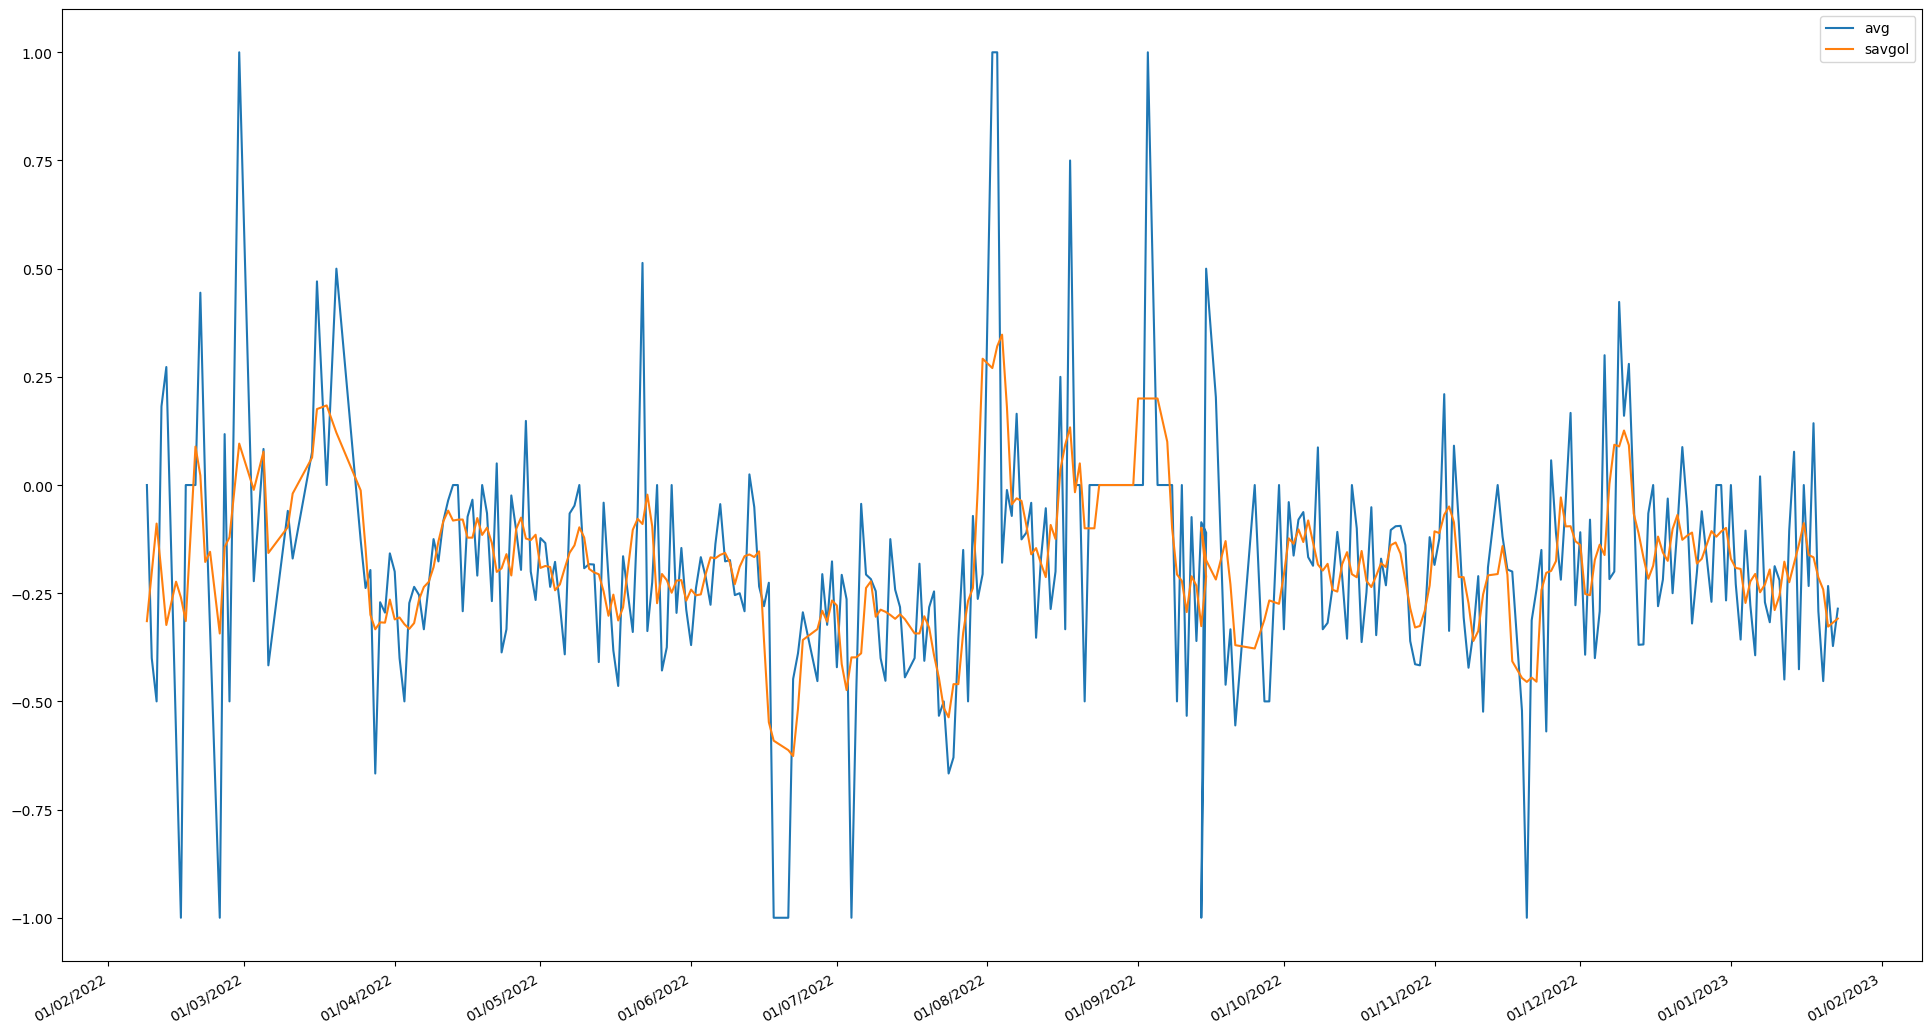

In [36]:
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.plot(real_dates, avg_sentiments, label='avg')
plt.plot(real_dates, savgol_filter(avg_sentiments, polyorder=1, window_length=5), label='savgol')

plt.gcf().autofmt_xdate()
_ = plt.legend()

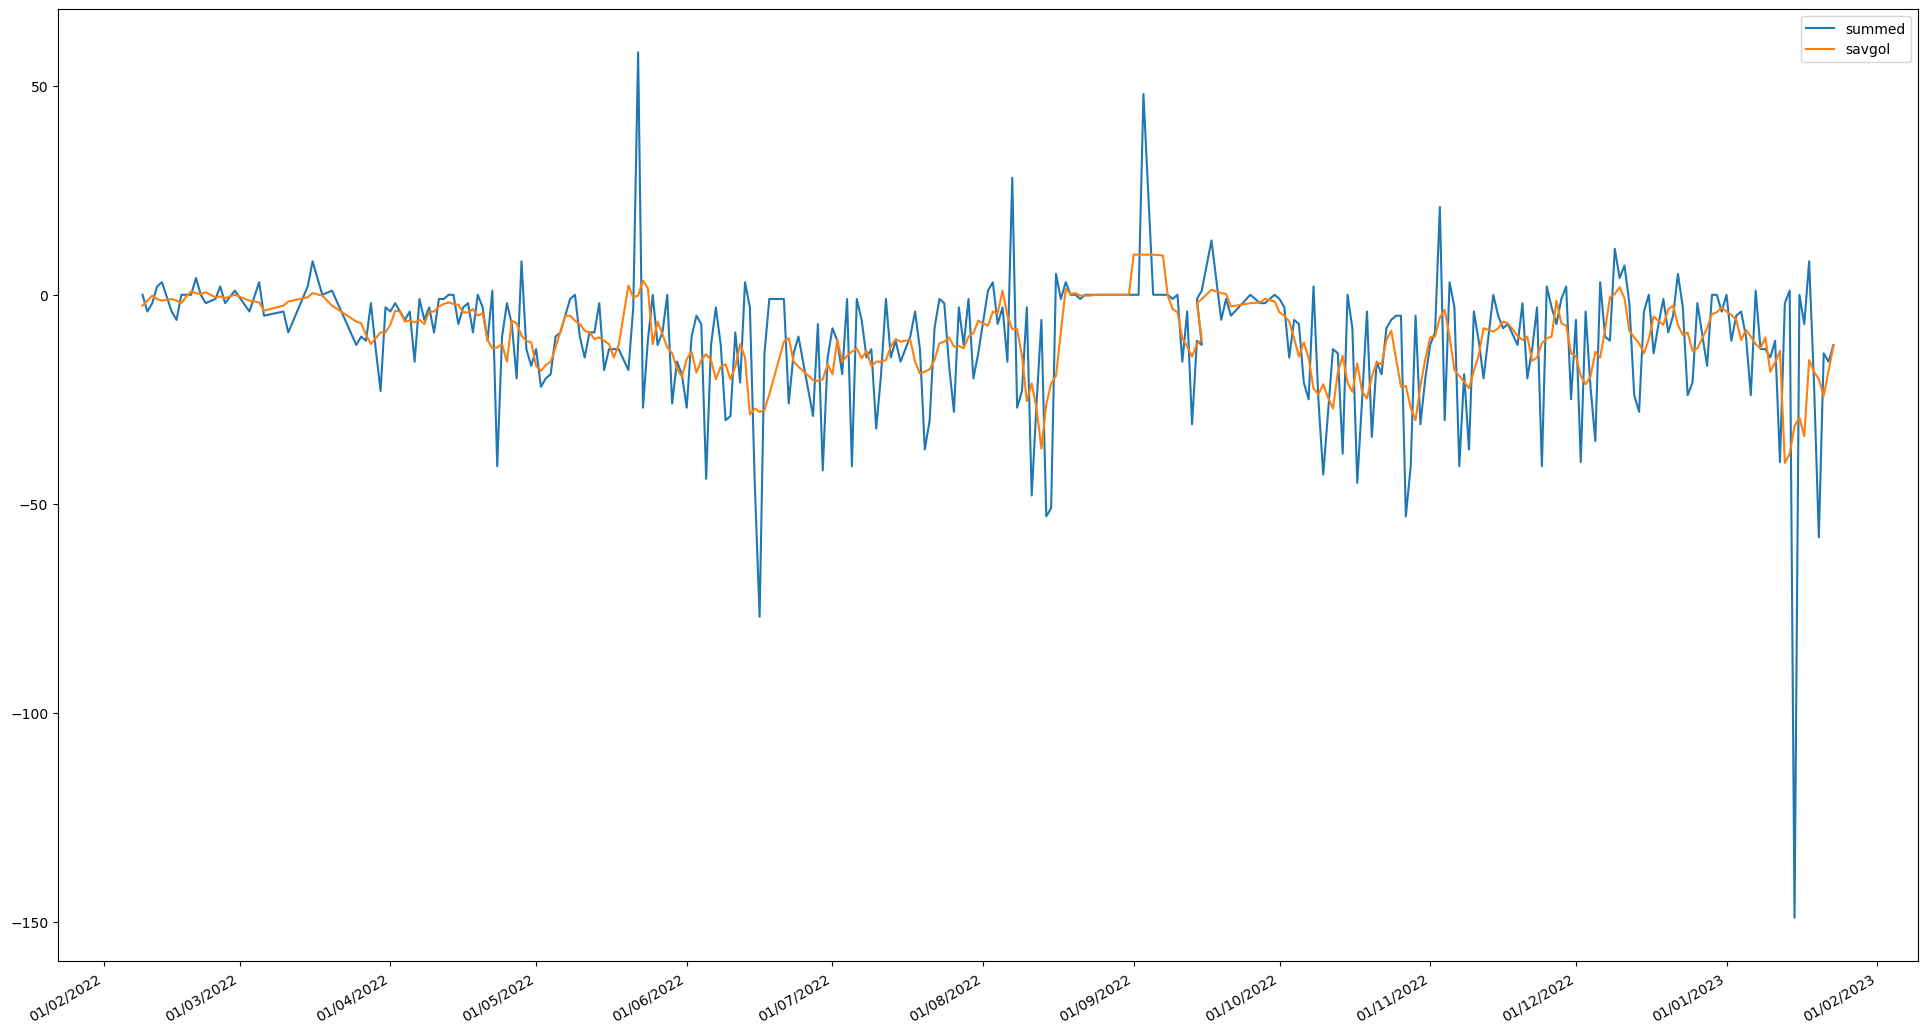

In [37]:
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.plot(real_dates, summed_sentiments, label='summed')
plt.plot(real_dates, savgol_filter(summed_sentiments, polyorder=1, window_length=5), label='savgol')

plt.gcf().autofmt_xdate()
_ = plt.legend()

In [59]:
# top three worst days of sentiments (index)
idx = summed_sentiments.argsort()[:3][::-1]
print(idx)
real_dates[idx]

[309 108 304]


array([datetime.date(2023, 1, 20), datetime.date(2022, 6, 16),
       datetime.date(2023, 1, 15)], dtype=object)